In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\anjal\\Desktop\\project-audio-spoofing\\frontend\\G_TRAIN_LA19.csv')

In [2]:
df.info()
X = df.iloc[:, 0:42].values
y = df.iloc[:,-1].values

y=y.astype(int)

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -3.1305      4128 non-null   float64
 1   -11.768      4128 non-null   float64
 2   3.1862       4128 non-null   float64
 3   0.079111     4128 non-null   float64
 4   0.30136      4128 non-null   float64
 5   -0.29491     4128 non-null   float64
 6   0.0045665    4128 non-null   float64
 7   -0.32552     4128 non-null   float64
 8   -0.022722    4128 non-null   float64
 9   -0.06348     4128 non-null   float64
 10  -0.014199    4128 non-null   float64
 11  -0.27704     4128 non-null   float64
 12  -0.09053     4128 non-null   float64
 13  -0.29234     4128 non-null   float64
 14  -0.045894    4128 non-null   float64
 15  -0.10915     4128 non-null   float64
 16  0.024324     4128 non-null   float64
 17  0.0042246    4128 non-null   float64
 18  0.0017968    4128 non-null   float64
 19  -0.001

In [3]:
model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_scaled, y)

train_acc = model.score(X_scaled, y)
print("The Accuracy for Training Set is {}".format(train_acc*100))

df = pd.read_csv('C:\\Users\\anjal\\Desktop\\project-audio-spoofing\\frontend\\G_TEST_LA19.csv')

df.info()


The Accuracy for Training Set is 95.97868217054264
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7354 entries, 0 to 7353
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -4.6003      7354 non-null   float64
 1   -13.045      7354 non-null   float64
 2   3.3278       7354 non-null   float64
 3   -0.22138     7354 non-null   float64
 4   0.38831      7354 non-null   float64
 5   -0.1003      7354 non-null   float64
 6   0.13063      7354 non-null   float64
 7   -0.050398    7354 non-null   float64
 8   0.053791     7354 non-null   float64
 9   -0.043787    7354 non-null   float64
 10  0.018655     7354 non-null   float64
 11  -0.18834     7354 non-null   float64
 12  -0.16344     7354 non-null   float64
 13  -0.25853     7354 non-null   float64
 14  -0.051261    7354 non-null   float64
 15  -0.114       7354 non-null   float64
 16  0.020024     7354 non-null   float64
 17  0.0048567    7354 non-null   float64
 1

In [4]:
x_test = df.iloc[:, 0:42].values
y_test = df.iloc[:,-1].values
#y_test=y.astype(int)

scaler = preprocessing.StandardScaler().fit(x_test)
x_scaled_test = scaler.transform(x_test)

y_pred=model.predict(x_scaled_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [5]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(y_test, y_pred))

The Accuracy for Test Set is 84.59341854772913
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.85      0.92      7354

    accuracy                           0.85      7354
   macro avg       0.50      0.42      0.46      7354
weighted avg       1.00      0.85      0.92      7354



C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


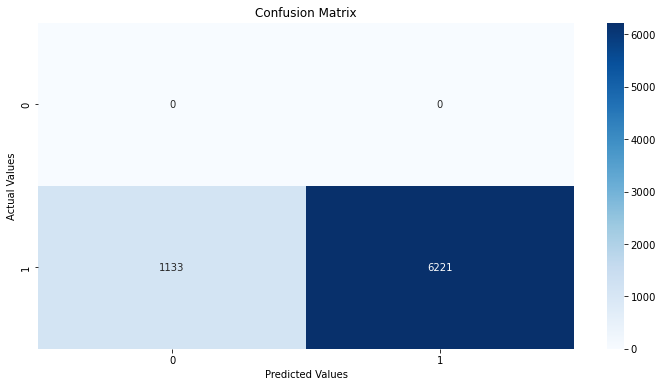

In [6]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test,y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
print(eer_threshold)
print("EER = ", EER)

C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


ValueError: All-NaN slice encountered